<a href="https://colab.research.google.com/github/jayadithya-g7/MLT-LAB-College/blob/main/Jayadithya_G_Assignment9_MLT_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Jayadithya.G**

**Roll No: 23011103019**

**Assignment-9, MLT Lab**

**Import necessary libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np


**install necessary dependencies**

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn numpy


<br>**Load the Iris and Wine Quality Datasets**<br>

In [ ]:
import pandas as pd

# Load the datasets
iris_df = pd.read_csv('iris (7).csv')  # Replace with the actual path if necessary
wine_df = pd.read_csv('WineQT.csv')  # Replace with the actual path if necessary

# Display first few rows of each dataset
print(iris_df.head())
# print(wine_df.head())


   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [ ]:
print(wine_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

<br>**Perform Exploratory Data Analysis (EDA) with Visualizations**<br>

For EDA, we'll use visualizations like histograms, box plots, pair plots, etc., to understand the data better.

**EDA for Iris Dataset**

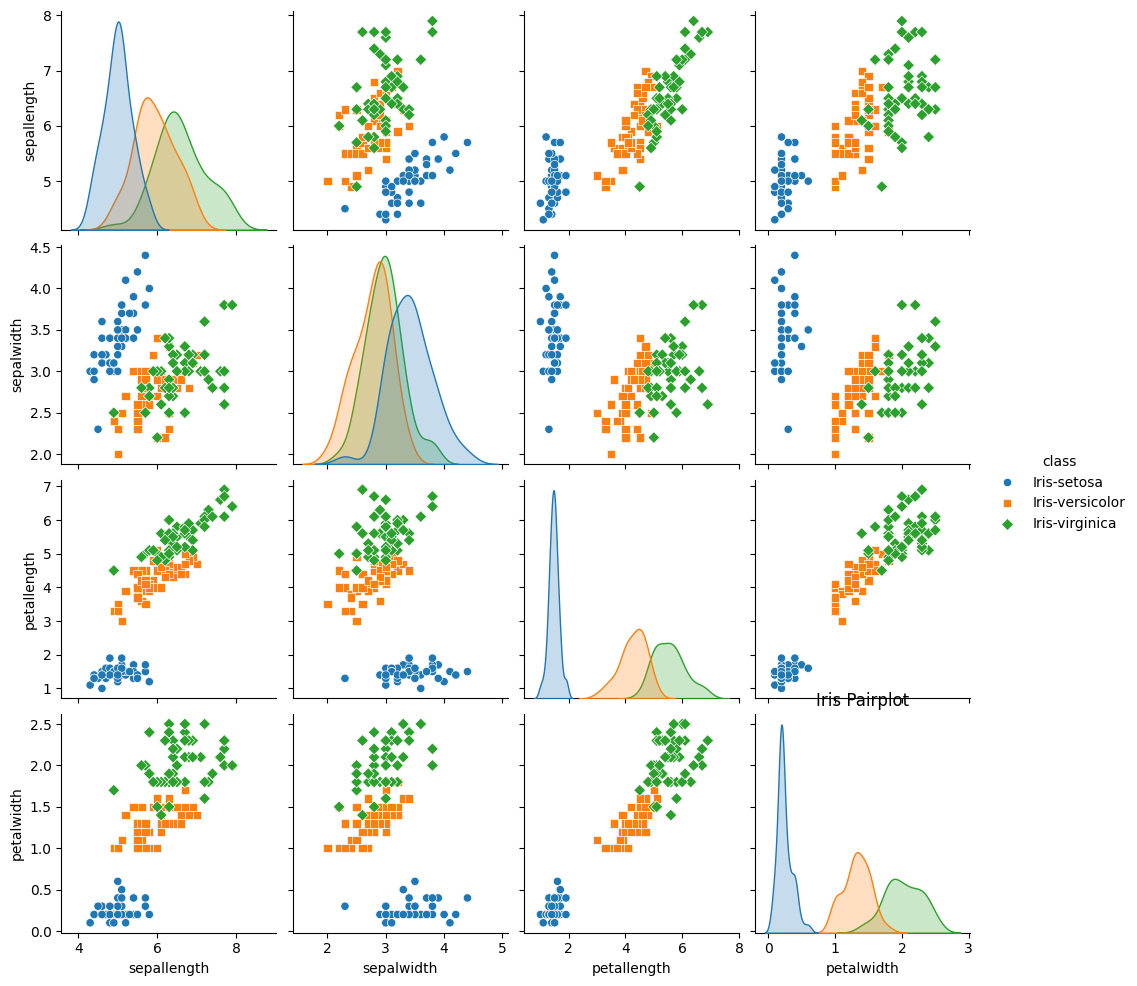

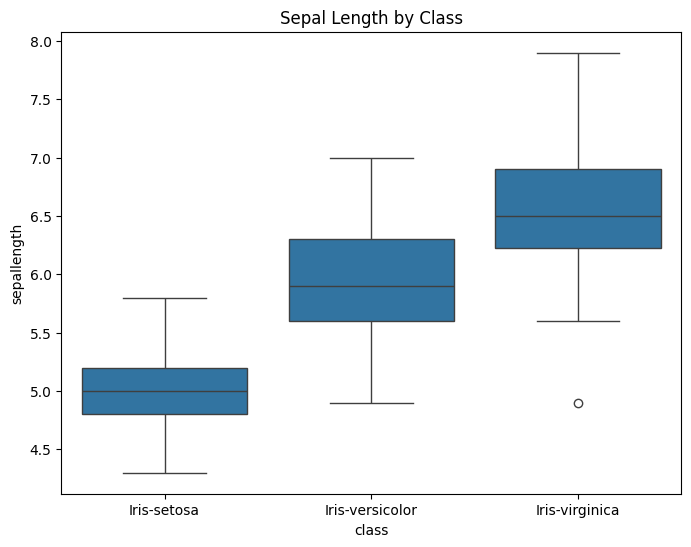

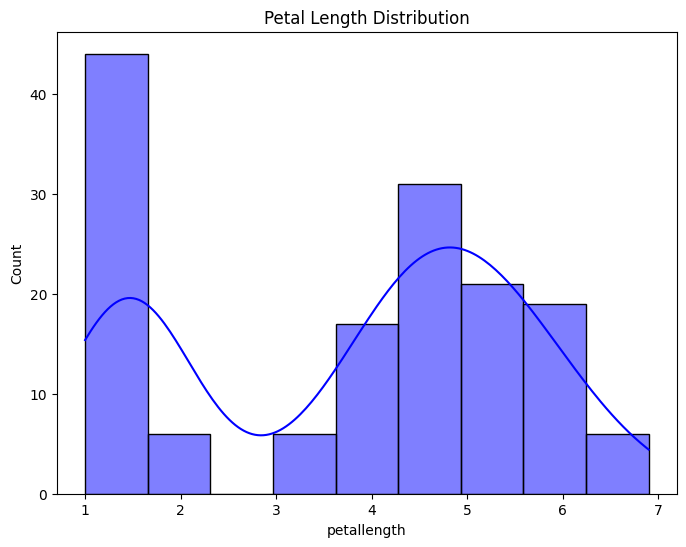

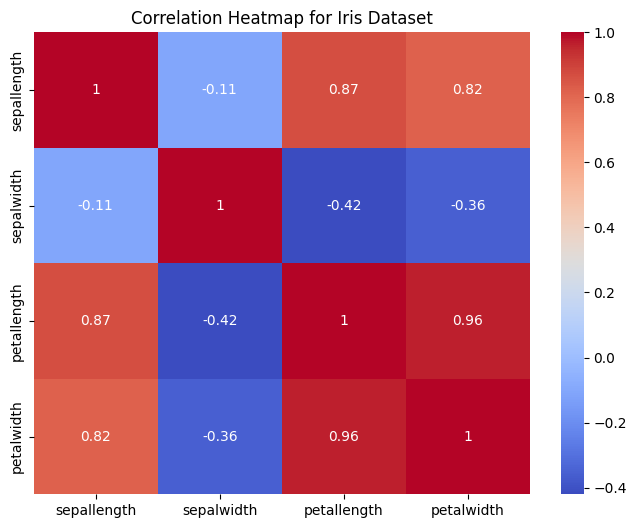

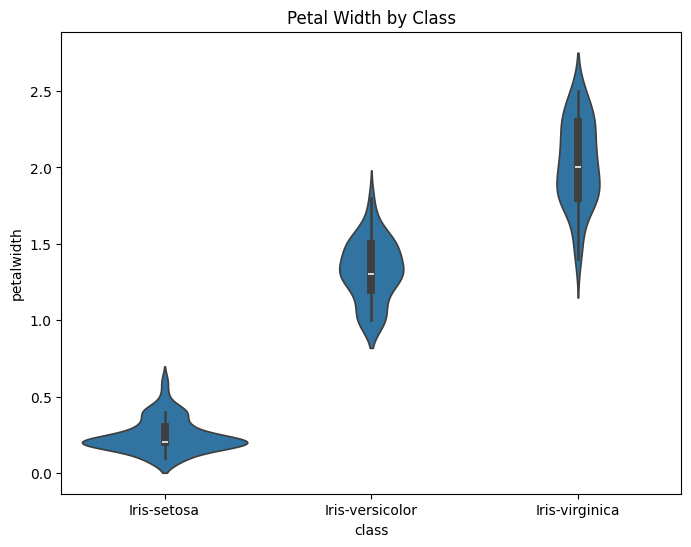

In [ ]:
# Strip any leading/trailing spaces from column names
iris_df.columns = iris_df.columns.str.strip()

# Pairplot
sns.pairplot(iris_df, hue='class', markers=["o", "s", "D"])
plt.title("Iris Pairplot")
plt.show()

# Boxplot for Sepal Length by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='sepallength', data=iris_df)
plt.title('Sepal Length by Class')
plt.show()

# Histogram for Petal Length
plt.figure(figsize=(8, 6))
sns.histplot(iris_df['petallength'], kde=True, color='blue')
plt.title('Petal Length Distribution')
plt.show()

# # Correlation Heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap for Iris Dataset")
# plt.show()

# Exclude the 'class' column which contains categorical values
numeric_columns = iris_df.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix only on numeric columns
correlation_matrix = iris_df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Iris Dataset")
plt.show()


# Violin plot for Petal Width by Class
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='petalwidth', data=iris_df)
plt.title('Petal Width by Class')
plt.show()


**EDA for WineQT dataset**

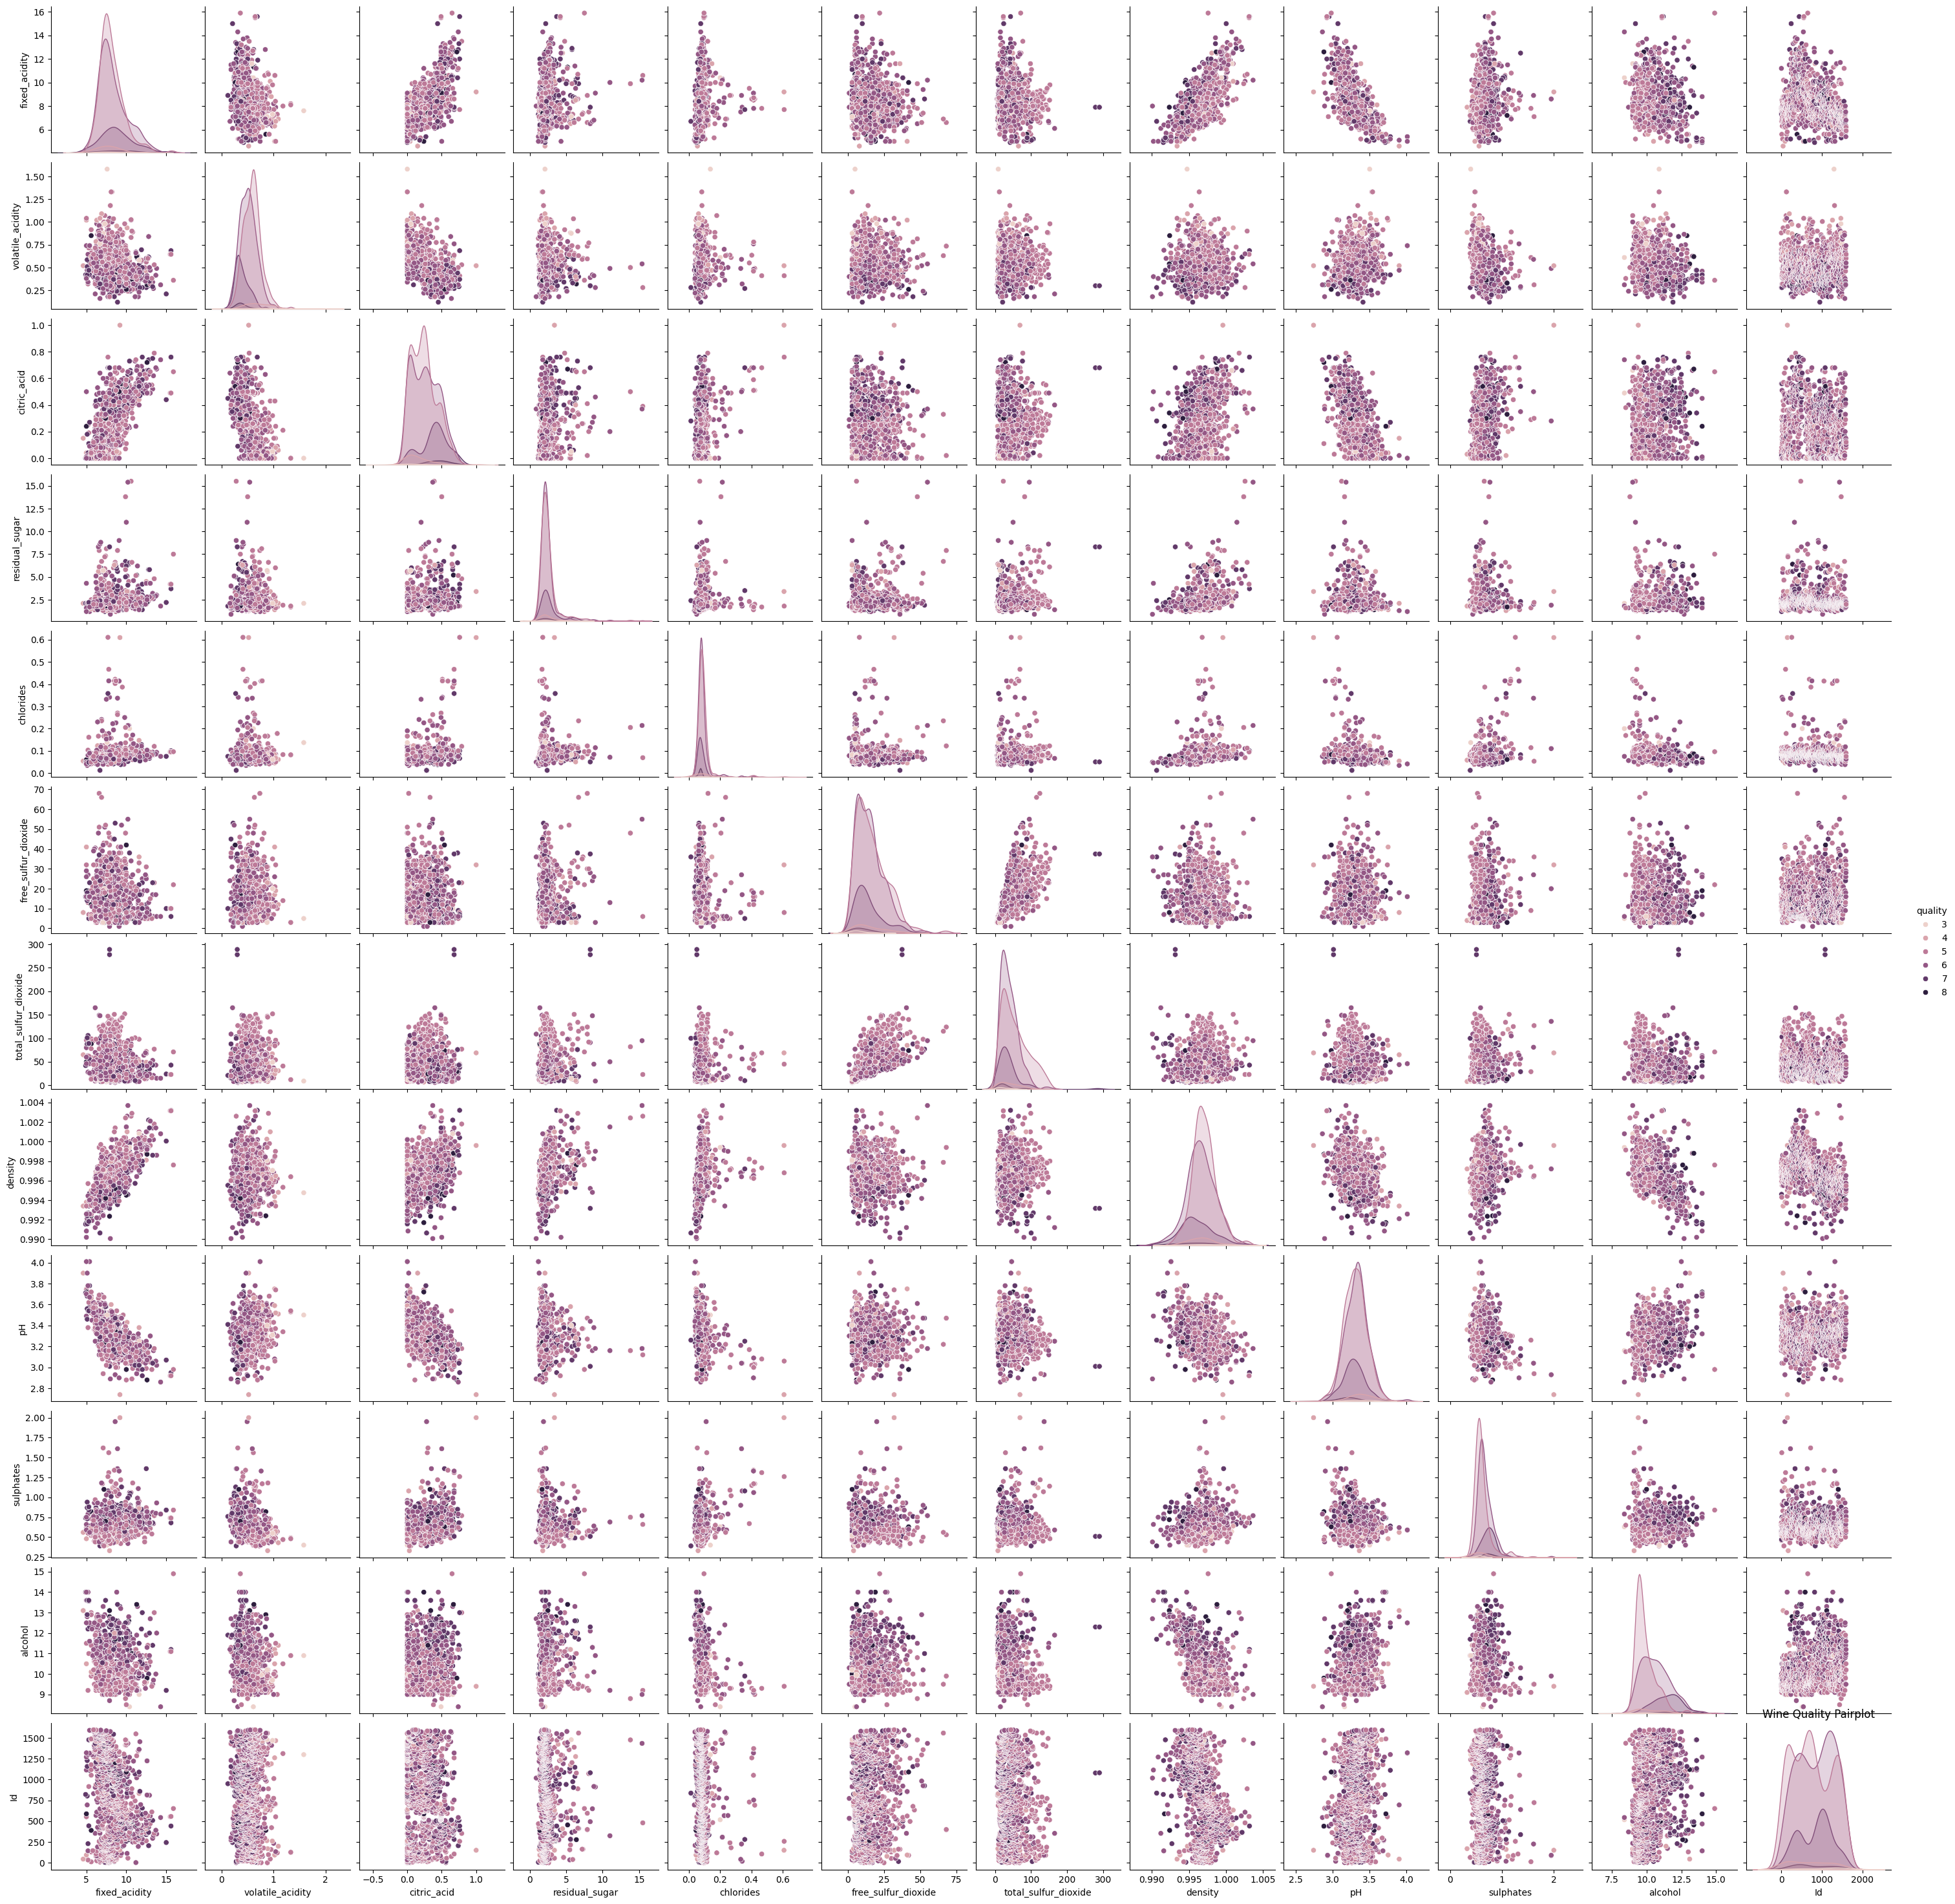

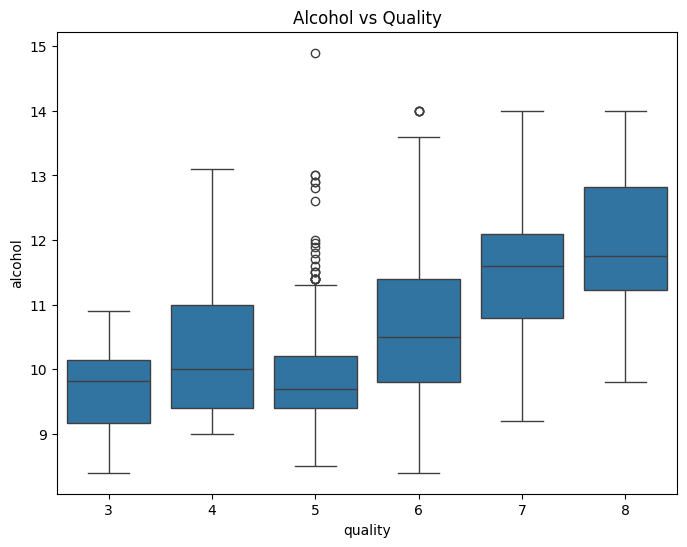

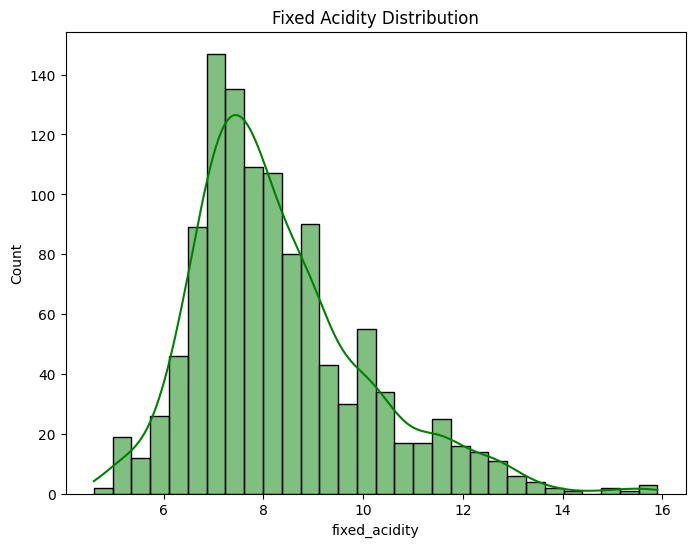

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


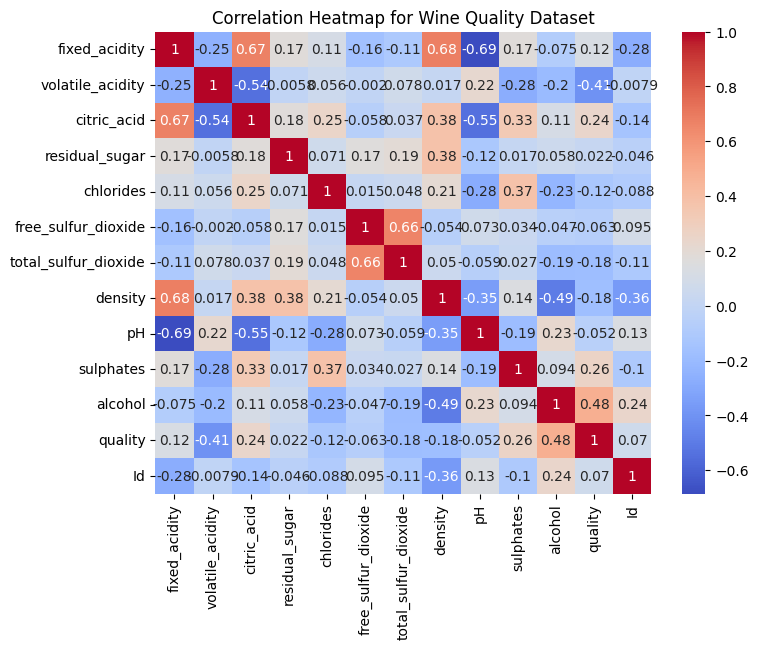

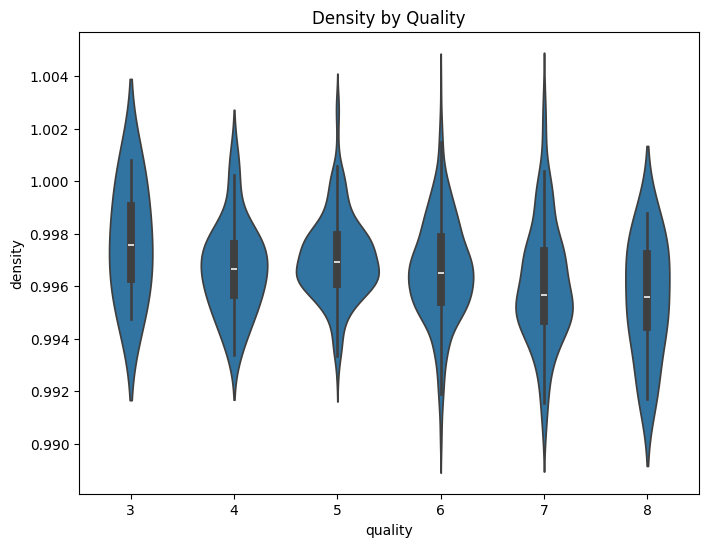

In [ ]:
# Pairplot for Wine Quality Dataset
sns.pairplot(wine_df, hue='quality')
plt.title("Wine Quality Pairplot")
plt.show()



# Boxplot for Alcohol vs Quality
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title('Alcohol vs Quality')
plt.show()




# # Histogram for Fixed Acidity
# If the column is not of numeric type, convert it to a numeric format

# Check and fix column names if necessary
wine_df.columns = wine_df.columns.str.strip()

# Convert 'fixed_acidity' to numeric if necessary
wine_df['fixed_acidity'] = pd.to_numeric(wine_df['fixed_acidity'], errors='coerce')

# Drop rows with NaN in 'fixed_acidity'
wine_df.dropna(subset=['fixed_acidity'], inplace=True)

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(wine_df['fixed_acidity'], kde=True, color='green')
plt.title('Fixed Acidity Distribution')
plt.show()




# Check and fix column names if necessary
wine_df.columns = wine_df.columns.str.strip()

# Check if 'fixed acidity' column exists
print(wine_df.columns)

# Now proceed with the correlation heatmap plot
# Correlation Heatmap for Wine Quality Dataset
plt.figure(figsize=(8, 6))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Wine Quality Dataset")
plt.show()




# Violin Plot for Density by Quality
plt.figure(figsize=(8, 6))
sns.violinplot(x='quality', y='density', data=wine_df)
plt.title('Density by Quality')
plt.show()


**Split the Data into Training and Testing Sets**

In [ ]:
# For Iris dataset
X_iris = iris_df.drop(columns='class')  # Features
y_iris = iris_df['class']  # Target variable

# Split into train and test sets (80% training, 20% testing)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# For Wine Quality dataset
X_wine = wine_df.drop(columns='quality')  # Features
y_wine = wine_df['quality']  # Target variable

# Split into train and test sets (80% training, 20% testing)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)


**Train a Decision Tree Classifier and Tune Hyperparameters**

In [ ]:
# For Iris dataset
dt_iris = DecisionTreeClassifier(random_state=42)
param_grid_iris = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_iris = GridSearchCV(dt_iris, param_grid_iris, cv=5, scoring='accuracy')
grid_search_iris.fit(X_train_iris, y_train_iris)

# For Wine Quality dataset
dt_wine = DecisionTreeClassifier(random_state=42)
param_grid_wine = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_wine = GridSearchCV(dt_wine, param_grid_wine, cv=5, scoring='accuracy')
grid_search_wine.fit(X_train_wine, y_train_wine)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

**Visualize the Decision Tree**

**For Iris Dataset**

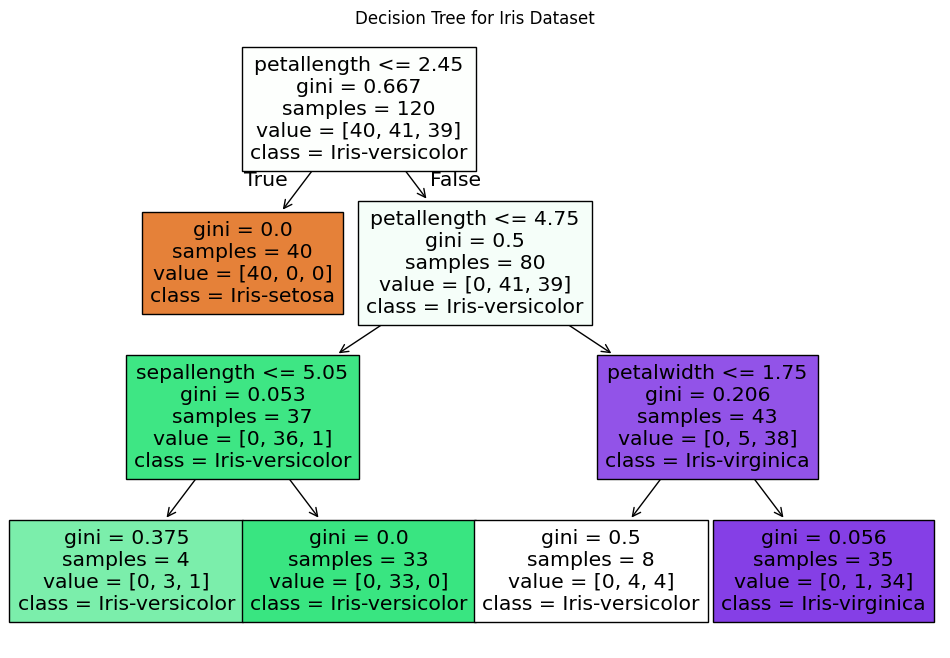

In [ ]:
# Visualizing Decision Tree for Iris dataset
best_dt_iris = grid_search_iris.best_estimator_
plt.figure(figsize=(12, 8))
plot_tree(best_dt_iris, filled=True, feature_names=X_iris.columns, class_names=best_dt_iris.classes_)
plt.title("Decision Tree for Iris Dataset")
plt.show()


**For Wine Quality Dataset**

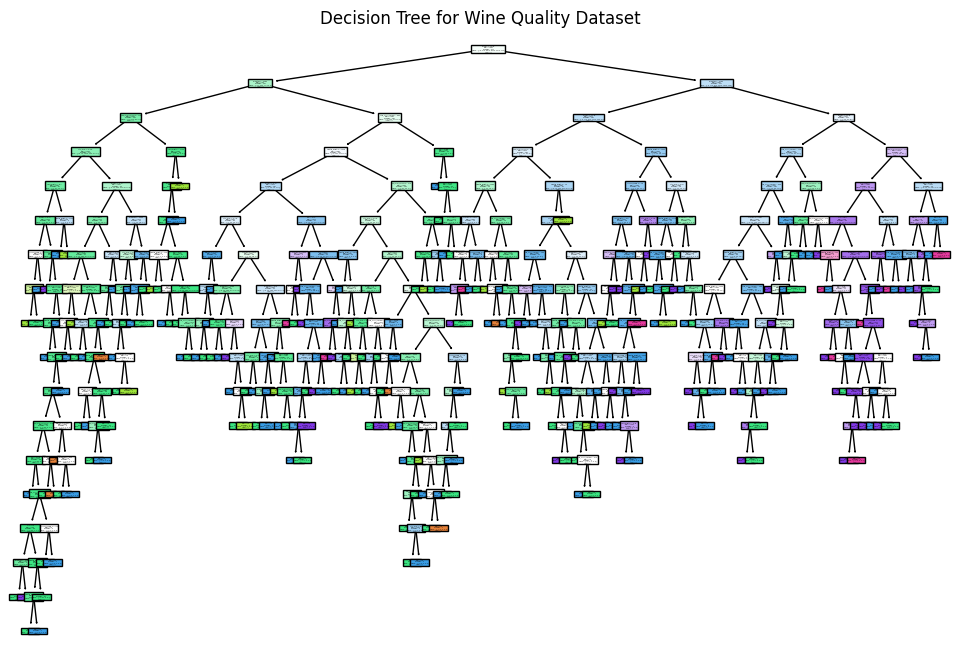

In [ ]:
# Visualizing Decision Tree for Wine Quality dataset
best_dt_wine = grid_search_wine.best_estimator_
plt.figure(figsize=(12, 8))
plot_tree(best_dt_wine, filled=True, feature_names=X_wine.columns, class_names=[str(i) for i in range(3, 10)])
plt.title("Decision Tree for Wine Quality Dataset")
plt.show()


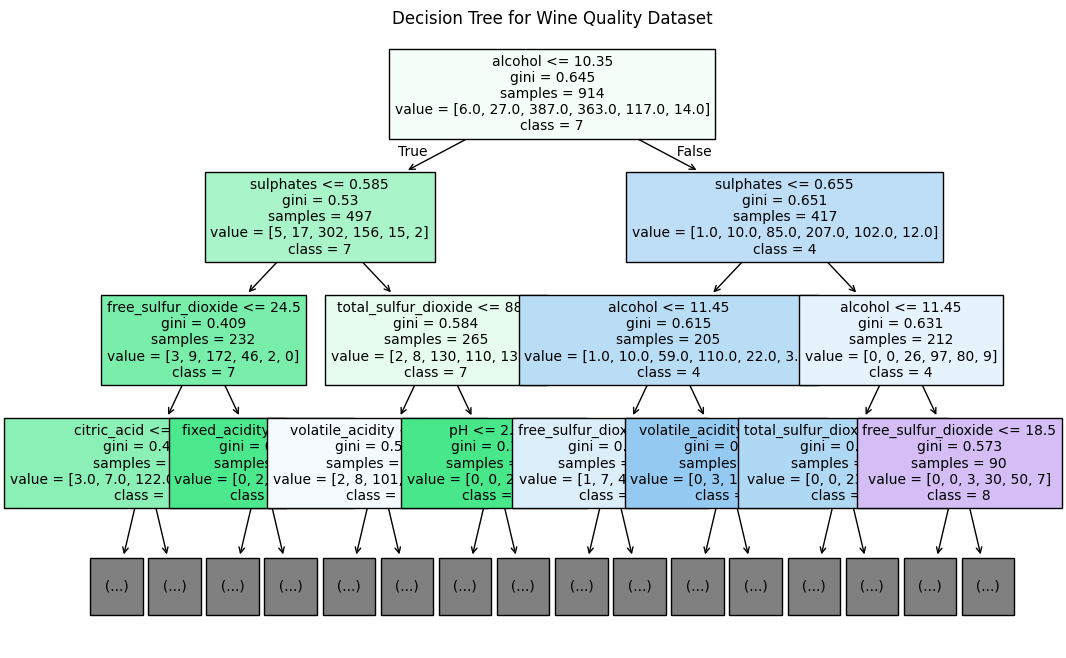

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(best_dt_wine, filled=True, feature_names=X_wine.columns, class_names=[str(i) for i in class_names], max_depth=3, fontsize=10)
plt.title("Decision Tree for Wine Quality Dataset")
plt.show()


**Plot Decision Boundaries (For Iris Dataset)**

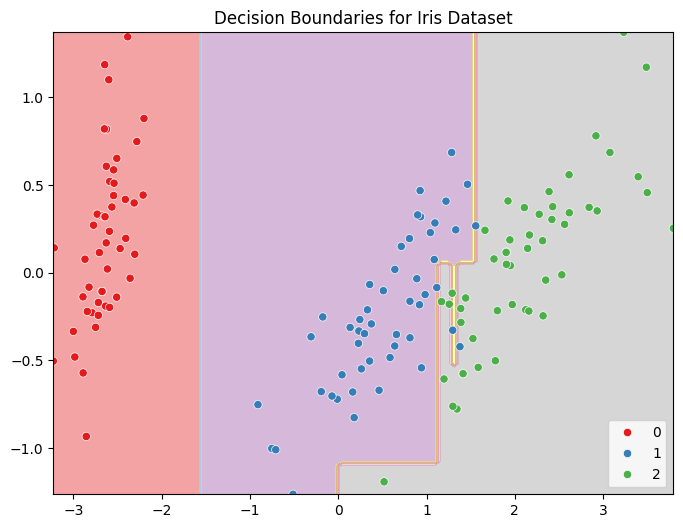

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Reduce dimensions to 2 using PCA for plotting decision boundaries
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

# Label encoding for the target variable y_iris
le = LabelEncoder()
y_iris_encoded = le.fit_transform(y_iris)

# Train decision tree classifier on 2D data
dt_iris_2d = DecisionTreeClassifier(random_state=42)
dt_iris_2d.fit(X_iris_pca, y_iris_encoded)

# Create meshgrid for decision boundaries
xx, yy = np.meshgrid(np.linspace(X_iris_pca[:, 0].min(), X_iris_pca[:, 0].max(), 100),
                     np.linspace(X_iris_pca[:, 1].min(), X_iris_pca[:, 1].max(), 100))

# Predict over the meshgrid to create the decision boundary
Z = dt_iris_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
sns.scatterplot(x=X_iris_pca[:, 0], y=X_iris_pca[:, 1], hue=y_iris_encoded, palette='Set1')
plt.title("Decision Boundaries for Iris Dataset")
plt.show()


**Plot Decision Boundaries for Wine Quality Dataset**

To plot decision boundaries for the Wine Quality dataset, we need to follow a similar process as we did for the Iris dataset, but with some adjustments since the Wine dataset has more features.



**Steps:**

Preprocess the Data: Use PCA to reduce the dimensions to 2.

Train a Decision Tree Classifier on the 2D transformed features.

Generate the Decision Boundaries: Create a mesh grid to evaluate predictions over the 2D space.

Plot the Decision Boundaries.

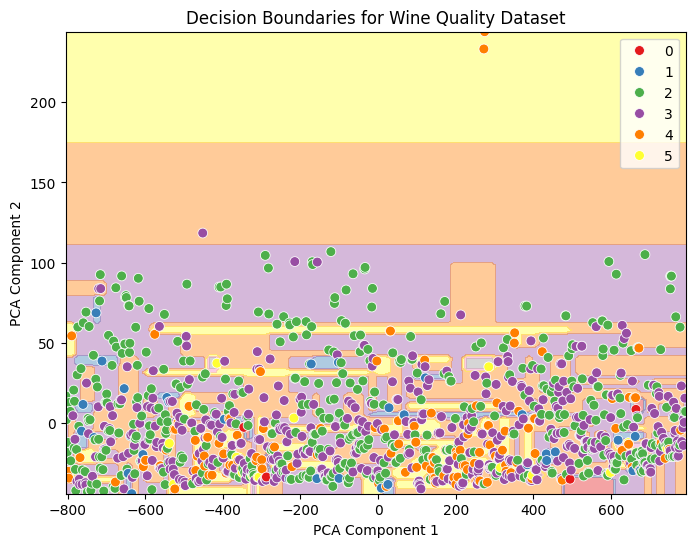

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess the Wine Quality dataset (assuming wine_df is loaded)
# X_wine = wine_df.drop(columns=['quality', 'Id'])  # Drop 'Id' and target 'quality' column
# y_wine = wine_df['quality']

# If needed, encode the target labels (wine quality values)
le = LabelEncoder()
y_wine_encoded = le.fit_transform(y_wine)

# Reduce dimensions to 2 using PCA for plotting decision boundaries
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine)

# Train a Decision Tree Classifier on the 2D data
dt_wine_2d = DecisionTreeClassifier(random_state=42)
dt_wine_2d.fit(X_wine_pca, y_wine_encoded)

# Create meshgrid for decision boundaries
xx, yy = np.meshgrid(np.linspace(X_wine_pca[:, 0].min(), X_wine_pca[:, 0].max(), 100),
                     np.linspace(X_wine_pca[:, 1].min(), X_wine_pca[:, 1].max(), 100))

# Predict over the meshgrid to create the decision boundary
Z = dt_wine_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')

# Scatter plot for the wine dataset
sns.scatterplot(x=X_wine_pca[:, 0], y=X_wine_pca[:, 1], hue=y_wine_encoded, palette='Set1', s=50)
plt.title("Decision Boundaries for Wine Quality Dataset")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


Explanation of the Code:

Data Preprocessing:

We first perform PCA to reduce the dimensionality of the features in the Wine dataset to 2 components (n_components=2). This helps visualize the data in a 2D space.

Label Encoding: We use LabelEncoder to encode the categorical target variable (y_wine), which contains wine quality ratings (e.g., 3 to 9) as integers.

Training a Decision Tree Classifier:


A Decision Tree Classifier (DecisionTreeClassifier) is trained using the reduced 2D features (X_wine_pca) and the encoded target variable (y_wine_encoded).

Meshgrid:


We create a meshgrid to span the feature space (PCA components 1 and 2). The meshgrid allows us to predict the class labels for all points in the 2D space.

Decision Boundary Plot:

plt.contourf() is used to plot the decision boundaries based on the predicted labels from the trained decision tree model.

sns.scatterplot() overlays the actual data points on top of the decision boundaries, colored by the encoded wine quality labels.

Result:

The resulting plot will show decision boundaries for different wine quality classes with the data points colored according to their actual wine quality ratings.

Adjustments You Can Make:

Colormap: You can modify the cmap argument in plt.contourf() to adjust the color palette.

Hyperparameter Tuning: You can experiment with different hyperparameters for the decision tree (e.g., max_depth) to adjust the complexity of the model and visualize how the decision boundaries change.


**Evaluate Model Performance**

**For Iris Dataset**

In [ ]:
# Evaluate the model for Iris dataset
y_pred_iris = grid_search_iris.best_estimator_.predict(X_test_iris)

# Accuracy
print("Accuracy for Iris:", accuracy_score(y_test_iris, y_pred_iris))

# Confusion Matrix
print("Confusion Matrix for Iris:")
print(confusion_matrix(y_test_iris, y_pred_iris))

# Classification Report
print("Classification Report for Iris:")
print(classification_report(y_test_iris, y_pred_iris))


Accuracy for Iris: 1.0
Confusion Matrix for Iris:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report for Iris:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**For Wine Quality Dataset**

In [ ]:
# Evaluate the model for Wine Quality dataset
y_pred_wine = grid_search_wine.best_estimator_.predict(X_test_wine)

# Accuracy
print("Accuracy for Wine Quality:", accuracy_score(y_test_wine, y_pred_wine))

# Confusion Matrix
print("Confusion Matrix for Wine Quality:")
print(confusion_matrix(y_test_wine, y_pred_wine))

# Classification Report
print("Classification Report for Wine Quality:")
print(classification_report(y_test_wine, y_pred_wine))


Accuracy for Wine Quality: 0.5633187772925764
Confusion Matrix for Wine Quality:
[[ 0  0  0  0  0  0]
 [ 0  2  2  1  1  0]
 [ 0  3 63 27  3  0]
 [ 2  1 32 45 17  2]
 [ 0  0  0  8 18  0]
 [ 0  0  0  0  1  1]]
Classification Report for Wine Quality:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.33      0.33      0.33         6
           5       0.65      0.66      0.65        96
           6       0.56      0.45      0.50        99
           7       0.45      0.69      0.55        26
           8       0.33      0.50      0.40         2

    accuracy                           0.56       229
   macro avg       0.39      0.44      0.41       229
weighted avg       0.58      0.56      0.56       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
